In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

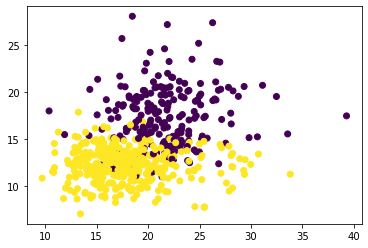

In [11]:
plt.scatter(df[['mean texture']], df[['mean radius']], c = cancer.target);

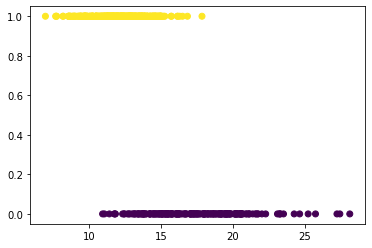

In [13]:
plt.scatter( df[['mean radius']], cancer.target, c = cancer.target);

In [16]:
# logistic regression (from sklearn)
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

X = df[['mean radius']]
y = cancer.target
LR.fit(X,y)

LogisticRegression()

In [18]:
LR.intercept_

array([15.120902])

In [20]:
LR.coef_

array([[-1.02475609]])

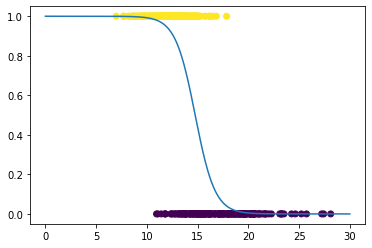

In [24]:
# Model generating predictor

xx = np.arange(0, 30, .01)
plt.plot(xx, 1 / (1 + np.exp(-LR.intercept_[0] -LR.coef_[0][0]*xx)))
plt.scatter( df[['mean radius']], cancer.target, c = cancer.target);

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cancer.target, LR.predict(X))

array([[167,  45],
       [ 24, 333]], dtype=int64)

In [30]:
LR.score(X,y)

0.8787346221441125

In [31]:
# Logistic regression on whole dataset.

In [37]:
LR = LogisticRegression(solver = 'newton-cg')

X = cancer.data
y = cancer.target
LR.fit(X,y)

LogisticRegression(solver='newton-cg')

In [38]:
LR.intercept_

array([28.08899511])

In [39]:
LR.coef_

array([[ 1.01456169,  0.18138296, -0.27569763,  0.02265073, -0.1783959 ,
        -0.22083834, -0.53504972, -0.29512034, -0.26623851, -0.03025583,
        -0.07839657,  1.26385632,  0.11658523, -0.10881522, -0.02509731,
         0.06721066, -0.03600668, -0.03799272, -0.03678053,  0.01398864,
         0.13786657, -0.43764261, -0.1058036 , -0.01363259, -0.356353  ,
        -0.68787434, -1.42190855, -0.60236278, -0.73090693, -0.09500144]])

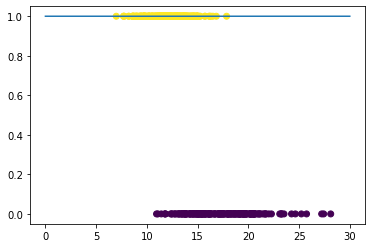

In [42]:
# Model generating predictor

xx = np.arange(0, 30, .01)
plt.plot(xx, 1 / (1 + np.exp(-LR.intercept_[0] -LR.coef_[0][0]*xx)))
plt.scatter( df[['mean radius']], cancer.target, c = cancer.target);

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cancer.target, LR.predict(X))

array([[197,  15],
       [  9, 348]], dtype=int64)

In [44]:
LR.score(X,y)

0.9578207381370826